In [1]:
!pip install sme

In [2]:
import sme
from matplotlib import pyplot as plt

####  Importing a model
- to load an existing model: `sme.open_sbml_file('model_filename.xml')`
- to load a built-in example model: `sme.open_example_model()`

In [3]:
my_model = sme.open_example_model()

####  Getting help
- to see the type of an object: `type(object)`
- to print a one line description of an object: `repr(object)`
- to print a multi-line description of an object: `print(object)`
- to get help on an object, its methods and properties: `help(object)`

In [4]:
type(my_model)

sme.Model

In [5]:
repr(my_model)

"<sme.Model named 'Very Simple Model'>"

In [6]:
print(my_model)

<sme.Model>
  - name: 'Very Simple Model'
  - compartments:
     - Outside
     - Cell
     - Nucleus


In [7]:
help(my_model)

Help on Model in module sme object:

class Model(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Model
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: sme.Model, filename: str) -> None
 |  
 |  __repr__(...)
 |      __repr__(self: sme.Model) -> str
 |  
 |  __str__(...)
 |      __str__(self: sme.Model) -> str
 |  
 |  compartment_image(...)
 |      compartment_image(self: sme.Model) -> List[List[List[int]]]
 |  
 |  concentration_image(...)
 |      concentration_image(self: sme.Model, time_point_index: int) -> List[List[List[int]]]
 |  
 |  export_sbml_file(...)
 |      export_sbml_file(self: sme.Model, filename: str) -> None
 |  
 |  simulate(...)
 |      simulate(self: sme.Model, simulation_time: float, image_interval: float) -> None
 |  
 |  simulation_time_points(...)
 |      simulation_time_points(self: sme.Model) -> List[float]
 |  
 |  --------------------------

####  Model contents
- the compartments in a model are stored as a dictionary, with the compartment names as keys
- a compartment can be looked up using its name: `model.compartments['compartment name']`
- or the compartments can be iterated over: `for name, compartment in model.compartments.items():`
- other objects, such as species in a compartment, or parameters in a reaction, can be accessed in the same way

In [8]:
type(my_model.compartments)

dict

In [9]:
print(my_model.compartments)

{'Cell': <sme.Compartment named 'Cell'>, 'Nucleus': <sme.Compartment named 'Nucleus'>, 'Outside': <sme.Compartment named 'Outside'>}


In [10]:
my_compartment = my_model.compartments['Cell']
print(my_compartment)

<sme.Compartment>
  - name: 'Cell'
  - species: 
     - A_cell
     - B_cell


In [11]:
for name, compartment in my_model.compartments.items():
    print(name)
    print(compartment)

Cell
<sme.Compartment>
  - name: 'Cell'
  - species: 
     - A_cell
     - B_cell
Nucleus
<sme.Compartment>
  - name: 'Nucleus'
  - species: 
     - A_nucl
     - B_nucl
Outside
<sme.Compartment>
  - name: 'Outside'
  - species: 
     - A_out
     - B_out


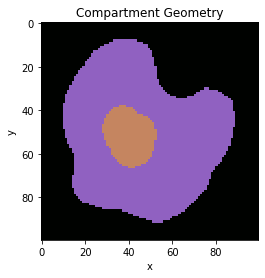

In [12]:
compartment_img = my_model.compartment_image()

plt.title("Compartment Geometry")
plt.xlabel("x")
plt.ylabel("y")
plt.imshow(compartment_img, interpolation='none')
plt.show()

In [13]:
my_reac = my_model.compartments['Nucleus'].reactions['A to B conversion']
print(my_reac)
for name, param in my_reac.parameters.items():
    print(param)

<sme.Reaction>
  - name: 'A to B conversion'

<sme.ReactionParameter>
  - name: 'k1'
  - value: '0.3'



####  Editing model parameters
- model parameters can be changed by assigning new values to them

In [14]:
print(my_model.name)

Very Simple Model


In [15]:
my_model.name = 'New model name!'

In [16]:
print(my_model.name)

New model name!


####  Simulation
- models can be simulated by specifying the total simulation time, and the interval between images
- after simulation, a list of available time points is provided
- along with a concentration image for each time point

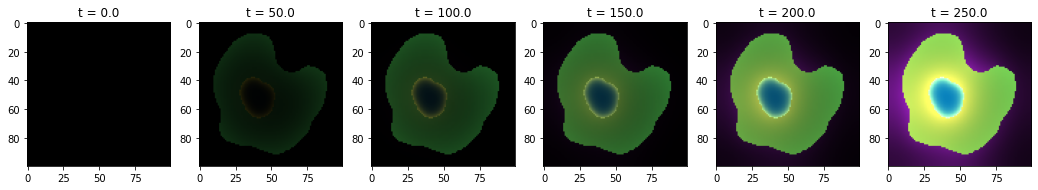

In [17]:
my_model.simulate(simulation_time=250.0, image_interval=50.0)
time_points = my_model.simulation_time_points()

fig, axs = plt.subplots(nrows=1, ncols=len(time_points), figsize=(18, 12))
for index, (ax, time_point) in enumerate(zip(axs, time_points)):
    ax.imshow(my_model.concentration_image(index))
    ax.set_title(f"t = {time_point}")
plt.show()

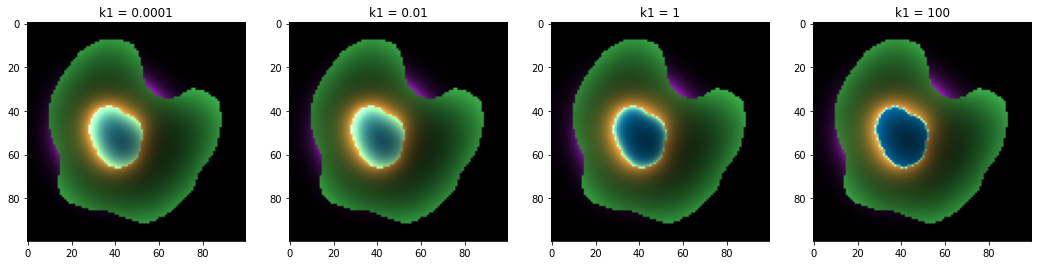

In [18]:
k1vals = [1e-4, 1e-2, 1, 100]
fig, axs = plt.subplots(nrows=1, ncols=len(k1vals), figsize=(18, 12))
for ax, k1 in zip(axs, k1vals):
    my_model.compartments['Nucleus'].reactions['A to B conversion'].parameters['k1'].value = k1
    my_model.simulate(simulation_time=25.0, image_interval=25.0)
    ax.imshow(my_model.concentration_image(1))
    ax.set_title(f"k1 = {k1}")
plt.show()

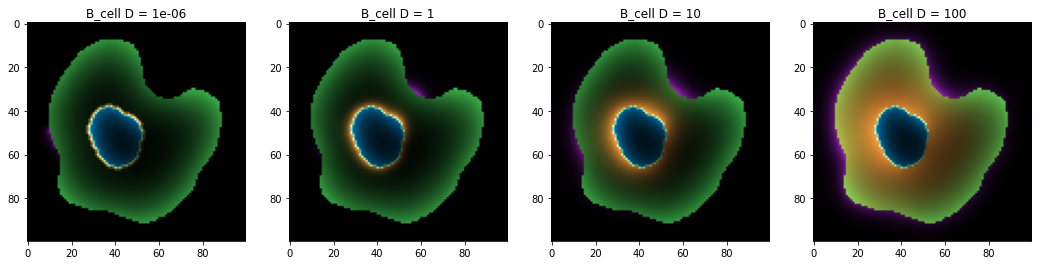

In [19]:
diffconsts = [1e-6, 1, 10, 100]
fig, axs = plt.subplots(nrows=1, ncols=len(diffconsts), figsize=(18, 12))
for ax, diffconst in zip(axs, diffconsts):
    my_model.compartments['Cell'].species['B_cell'].diffusion_constant = diffconst
    my_model.simulate(simulation_time=15.0, image_interval=15.0)
    ax.imshow(my_model.concentration_image(1))
    ax.set_title(f"B_cell D = {diffconst}")
plt.show()